In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Data_csv.csv")

In [5]:
df

,Employee_ID,Age,Salary,Experience_Years,Gender,Deparment
0,1,51.0,48795.0,4.0,Male,IT
1,2,35.0,82588.0,6.0,Male,IT
2,3,37.0,84713.0,3.0,Female,IT
3,4,60.0,52211.0,6.0,Female,ICT
4,5,34.0,57951.0,9.0,Female,IT
...,...,...,...,...,...,...
95,96,25.0,93535.0,4.0,Female,EG
96,97,51.0,82807.0,11.0,Male,IT
97,98,61.0,200000.0,10.0,Female,ICT
98,99,56.0,44195.0,8.0,Male,Civil


In [7]:
df.columns

Index(['Employee_ID', 'Age', 'Salary', 'Experience_Years', 'Gender',
       'Deparment'],
      dtype='object')

In [9]:
df['Age'].dtype

dtype('float64')

In [11]:
# To check the null value in the data frame
df.isnull().sum()

Employee_ID         0
Age                 2
Salary              2
Experience_Years    2
Gender              0
Deparment           2
dtype: int64

In [21]:
numerical_category = df[['Age','Salary','Experience_Years']]
numerical_category

,Age,Salary,Experience_Years
0,51.0,48795.0,4.0
1,35.0,82588.0,6.0
2,37.0,84713.0,3.0
3,60.0,52211.0,6.0
4,34.0,57951.0,9.0
...,...,...,...
95,25.0,93535.0,4.0
96,51.0,82807.0,11.0
97,61.0,200000.0,10.0
98,56.0,44195.0,8.0


In [25]:
numerical_category.skew(axis=0,skipna = True)

Age                 0.049242
Salary              2.211647
Experience_Years   -0.082949
dtype: float64

In [27]:
#Using the simple imputer to fill the missing value in the numerical columns
from sklearn.impute import SimpleImputer
import numpy as np
impute = SimpleImputer(missing_values=np.nan,strategy='mean')
df['Age'] = impute.fit_transform(df[['Age']])
df['Salary'] = impute.fit_transform(df[['Salary']])
df['Experience_Years'] = impute.fit_transform(df[['Experience_Years']])

In [29]:
# Coverting to the int type as it stays at as float number
df['Age'] = df['Age'].astype(int)
df['Salary'] = df['Salary'].astype(int)
df['Experience_Years'] = df['Experience_Years'].astype(int)

In [31]:
#Using the mode to fill the missing categorical column
most_frequent_fbs = df['Deparment'].value_counts().index[0]
df['Deparment'] = df['Deparment'].fillna(most_frequent_fbs)


In [33]:
# One-hot encoding
df = pd.get_dummies(df,columns=['Gender'],dtype=int)

In [35]:
#One-hot encoding
df = pd.get_dummies(df,columns=['Deparment'],dtype=int)

In [37]:
df

,Employee_ID,Age,Salary,Experience_Years,Gender_Female,Gender_Male,Deparment_Civil,Deparment_EG,Deparment_ICT,Deparment_IT
0,1,51,48795,4,0,1,0,0,0,1
1,2,35,82588,6,0,1,0,0,0,1
2,3,37,84713,3,1,0,0,0,0,1
3,4,60,52211,6,1,0,0,0,1,0
4,5,34,57951,9,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
95,96,25,93535,4,1,0,0,1,0,0
96,97,51,82807,11,0,1,0,0,0,1
97,98,61,200000,10,1,0,0,0,1,0
98,99,56,44195,8,0,1,1,0,0,0


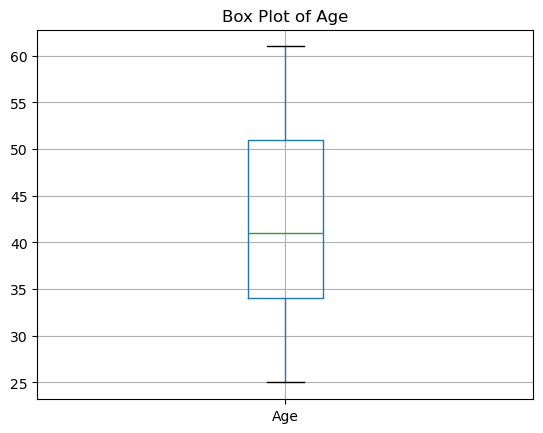

In [39]:
#Detecting the outlier using the box and whisker plot
ax = df.boxplot(column='Age')
plt.title('Box Plot of Age')
plt.show()

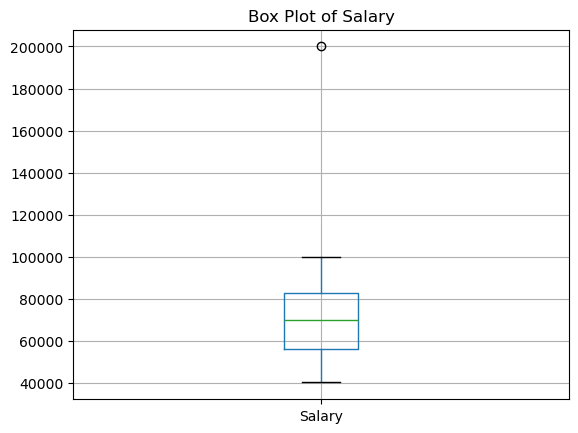

In [41]:
# Detecting the outlier using the box and whisker plot
ax = df.boxplot(column='Salary')
plt.title('Box Plot of Salary')
plt.show()

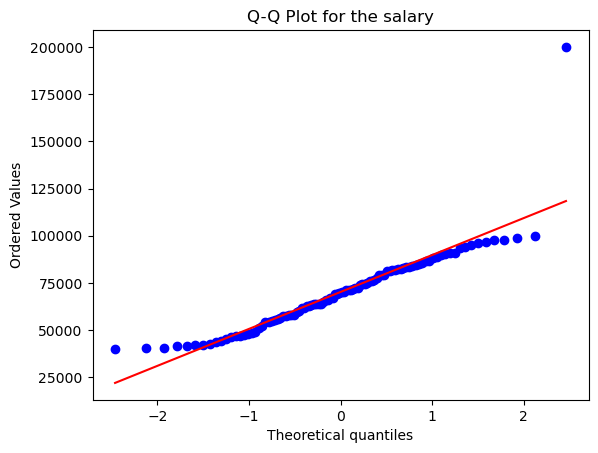

In [43]:
#Doing analyses using various tool and techniques
#Quantile-Quantile plot
import scipy.stats as stats
stats.probplot(df['Salary'],dist="norm",plot=plt)
plt.title("Q-Q Plot for the salary")
plt.show()

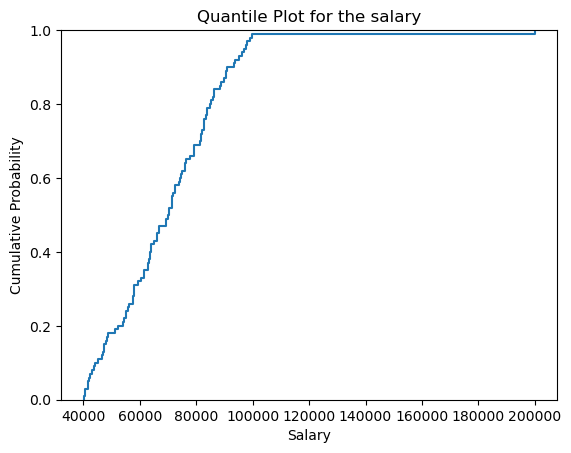

In [45]:
#Quantile plot
sns.ecdfplot(df['Salary'])
plt.title("Quantile Plot for the salary")
plt.xlabel("Salary")
plt.ylabel("Cumulative Probability")
plt.show()

In [47]:
#5 number summary for the given dataframe
summary = df['Salary'].describe(percentiles=[0.25,0.5,0.75])
five_number_summary = summary.loc[['min','25%','50%','75%','max']]
print(five_number_summary)

min     40205.00
25%     56184.25
50%     70042.50
75%     82665.25
max    200000.00
Name: Salary, dtype: float64


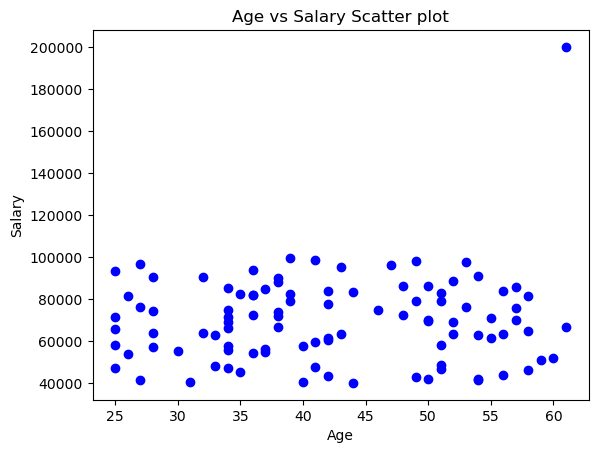

In [49]:
# for the scatter plot
plt.scatter(df['Age'],df['Salary'],color='blue',marker='o')
plt.xlabel("Age")
plt.ylabel('Salary')
plt.title('Age vs Salary Scatter plot')
plt.show()

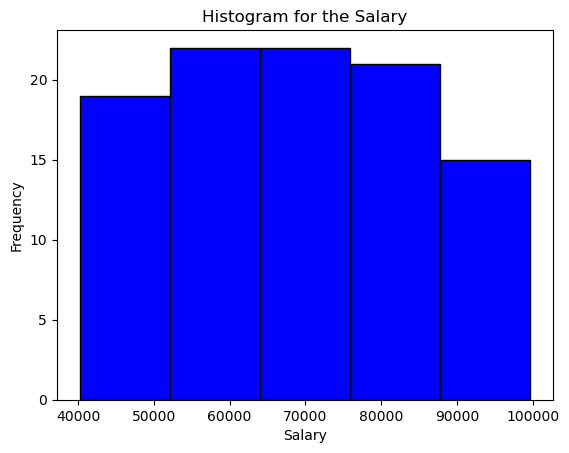

In [63]:
# Creating a histogram for the given dataset
plt.hist(df['Salary'],bins=5,color='blue',edgecolor='black')
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Histogram for the Salary")
plt.show()

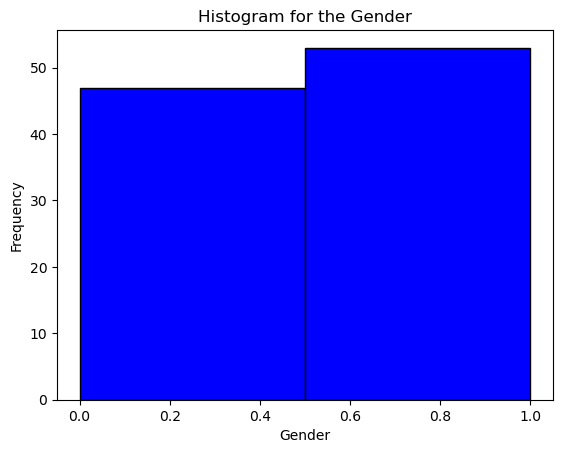

In [55]:
#Histogram for the Gender
plt.hist(df['Gender_Male'],bins=2,color='blue',edgecolor='black')
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Histogram for the Gender")
plt.show()

In [59]:
# Detecting the index of the particular outlier in the dataset
Outlier = df.loc[df["Salary"] == 200000]
print(Outlier)

    Employee_ID  Age  Salary  Experience_Years  Gender_Female  Gender_Male  \
97           98   61  200000                10              1            0   

    Deparment_Civil  Deparment_EG  Deparment_ICT  Deparment_IT  
97                0             0              1             0  


In [61]:
# Removing the particular outlier in the row
df.drop(index= 97,inplace=True)
# Reseting the index for the removed tuple
df.reset_index(drop=True,inplace=True)
# Removing the Employee_ID and it does not have much significances
df.drop(columns=['Employee_ID'],inplace= True)

In [123]:
# Test-Train split
from sklearn.model_selection import train_test_split
y = df.iloc[:,1]
X = df.drop(df.columns[1], axis=1)

In [125]:
X

,Age,Experience_Years,Gender_Female,Gender_Male,Deparment_Civil,Deparment_EG,Deparment_ICT,Deparment_IT
0,25,2,0,1,0,0,0,1
1,30,5,1,0,1,0,0,0
2,35,7,1,0,0,0,0,1
3,40,10,0,1,0,0,1,0
4,29,7,1,0,0,0,0,1
5,28,3,0,1,0,1,0,0
6,42,12,0,1,0,0,1,0
7,34,6,0,1,0,0,0,1
8,31,8,1,0,1,0,0,0


In [127]:
y

0    40000
1    50000
2    60000
3    70000
4    55000
5    45000
6    65000
7    62000
8    71888
Name: Salary, dtype: int32

In [161]:
# Using the min-max scaling to scale the numberical values
from sklearn.preprocessing import MinMaxScaler,StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [135]:
X_train

,Age,Experience_Years,Gender_Female,Gender_Male,Deparment_Civil,Deparment_EG,Deparment_ICT,Deparment_IT
5,28,3,0,1,0,1,0,0
0,25,2,0,1,0,0,0,1
8,31,8,1,0,1,0,0,0
2,35,7,1,0,0,0,0,1
4,29,7,1,0,0,0,0,1
3,40,10,0,1,0,0,1,0
6,42,12,0,1,0,0,1,0


In [145]:
scaler = MinMaxScaler()
X_train[['Age','Experience_Years']] = scaler.fit_transform(X_train[['Age','Experience_Years']])
X_test[['Age','Experience_Years']] = scaler.fit_transform(X_test[['Age','Experience_Years']])

In [147]:
X_train

,Age,Experience_Years,Gender_Female,Gender_Male,Deparment_Civil,Deparment_EG,Deparment_ICT,Deparment_IT
5,0.176471,0.1,0,1,0,1,0,0
0,0.000000,0.0,0,1,0,0,0,1
8,0.352941,0.6,1,0,1,0,0,0
2,0.588235,0.5,1,0,0,0,0,1
4,0.235294,0.5,1,0,0,0,0,1
3,0.882353,0.8,0,1,0,0,1,0
6,1.000000,1.0,0,1,0,0,1,0


In [149]:
X_test

,Age,Experience_Years,Gender_Female,Gender_Male,Deparment_Civil,Deparment_EG,Deparment_ICT,Deparment_IT
7,1.0,1.0,0,1,0,0,0,1
1,0.0,0.0,1,0,1,0,0,0


In [153]:
y_train

5    45000
0    40000
8    71888
2    60000
4    55000
3    70000
6    65000
Name: Salary, dtype: int32

In [169]:
y_train= scaler.fit_transform(y_train.values.reshape(-1, 1))


y_train = pd.DataFrame(y_train, columns=["Salary"])

y_test= scaler.fit_transform(y_test.values.reshape(-1, 1))

y_test = pd.DataFrame(y_test, columns=["Salary"])

In [171]:
y_train

,Salary
0,0.156799
1,0.000000
2,1.000000
3,0.627195
4,0.470396
5,0.940793
6,0.783994


In [173]:
y_test

,Salary
0,1.0
1,0.0


In [183]:
df.to_csv("Preprocessed_Data.csv",index=False)